## TMDB Movie Data Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pandas import json_normalize

import warnings
warnings.filterwarnings('ignore')

In [2]:
movie=pd.read_csv('DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv')
movie.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
movie.describe

<bound method NDFrame.describe of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   

In [5]:
movie.genres=movie.genres.apply(lambda x: [item['name'] for item in json.loads(x) ])
movie.keywords=movie.keywords.apply(lambda x: [item['name'] for item in json.loads(x) ])
movie.production_companies =movie.production_companies.apply(lambda x: [item['name'] for item in json.loads(x) ])
movie.production_countries=movie.production_countries.apply(lambda x: [item['name'] for item in json.loads(x) ])
movie.spoken_languages=movie.spoken_languages.apply(lambda x: [item['name'] for item in json.loads(x) ])






In [6]:
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10-12-2009,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],19-05-2007,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",26-10-2015,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],16-07-2012,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],07-03-2012,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Task 1.
Display the numbers of rows and columns in the dataset.
Display the titles and genres of the first 50 movies from the dataset.

In [7]:
movie.shape

(4803, 20)

In [8]:
movie[['title','genres']].head(50)


,title,genres
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Fantasy, Action, Adventure]"
6,Tangled,"[Animation, Family]"
7,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Action, Adventure, Fantasy]"


# Task - 2 
# Identify the columns that have null values and perform the null value treatment. (Choose the imputation method based on the type of data in the columns of interest)
 

In [9]:
movie.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [10]:
movie.dropna(subset='release_date',inplace=True)
movie.runtime.fillna(movie.runtime.mean,inplace=True)


In [11]:
movie.isnull().sum()

budget                     0
genres                     0
homepage                3090
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  843
title                      0
vote_average               0
vote_count                 0
dtype: int64

# Task -3: 
# Display the movie categories that have a budget greater than $220,000.


In [12]:
movie_genre_flaten=movie.explode('genres')
t3_nocondition=pd.pivot_table(index='genres',values='budget',data=movie_genre_flaten,aggfunc='mean')
t3=t3_nocondition[t3_nocondition.budget>220000].sort_values('budget',ascending=False)


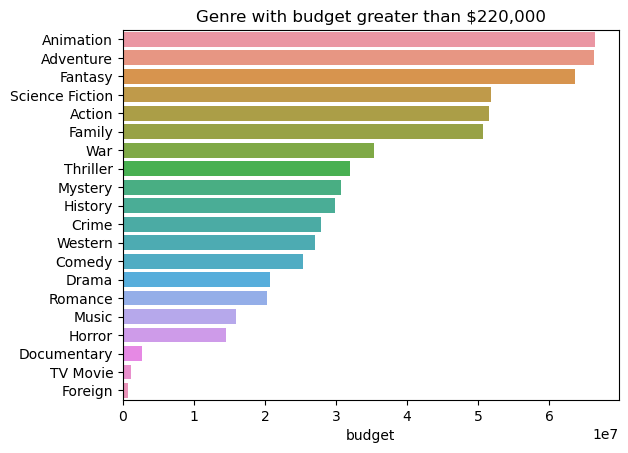

In [13]:
plt.title('Genre with budget greater than $220,000')
sns.barplot(x=t3.budget,y=t3.index)
plt.xlabel('budget')
plt.ylabel('')
plt.show()

# Task -4:
# Display the movie categories where the revenue is greater than $961,000,000.
# 

In [14]:
t4_nocondition=pd.pivot_table(index='genres',values='revenue',data=movie_genre_flaten,aggfunc='sum')
t4=t4_nocondition[t4_nocondition.revenue>961000000].sort_values('revenue',ascending=False)


In [15]:
t4

,revenue
genres,
Adventure,164841561551
Action,162959914515
Comedy,122760517608
Drama,119710983984
Thriller,103250426269
Family,83283238689
Fantasy,81982199925
Science Fiction,81564235745
Romance,53642137545


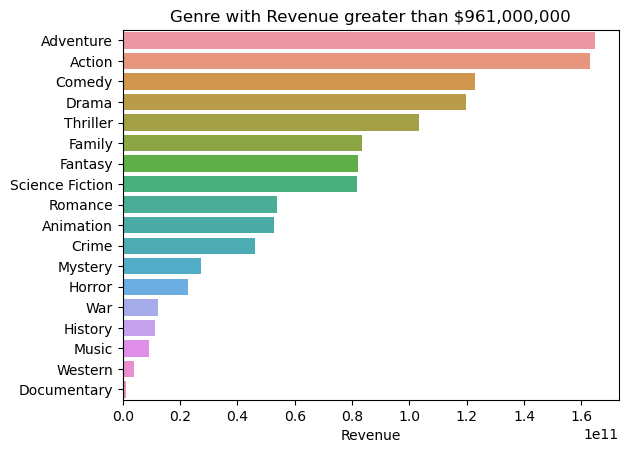

In [16]:
plt.title('Genre with Revenue greater than $961,000,000')
sns.barplot(x=t4.revenue,y=t4.index)
plt.xlabel('Revenue')
plt.ylabel('')
plt.show()

# Task - 5 
# In the dataset, there are some movies for which the budget and revenue columns have the value 0, which mean unknown values. Remove the rows with value 0 from both the budget and revenue columns.


In [17]:
movie = movie[(movie['budget'] != 0) ]
movie= movie[(movie['revenue'] != 0) ]


# Task - 6 
# List the top 10 movies with the highest revenues and the top 10 movies with the least budget. 
# 

In [18]:
top_10_movies=movie[['original_title','budget']]\
.sort_values('budget',ascending=False).nlargest(10,columns='budget')
top_10_movies

,original_title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
10,Superman Returns,270000000
4,John Carter,260000000
6,Tangled,260000000
5,Spider-Man 3,258000000
13,The Lone Ranger,255000000
98,The Hobbit: An Unexpected Journey,250000000
26,Captain America: Civil War,250000000


In [19]:
top_10lowest_movies=movie[['original_title','budget']]\
.sort_values('budget',ascending=False).nsmallest(10,columns='budget')
top_10lowest_movies


,original_title,budget
4238,Modern Times,1
3611,A Farewell to Arms,4
3372,Split Second,7
3419,Bran Nue Dae,7
4608,The Prophecy,8
3131,Hross í oss,10
3137,Nurse 3-D,10
2933,F.I.S.T.,11
1912,Angela's Ashes,25
1771,The 51st State,28


Text(0, 0.5, 'Movie Title')

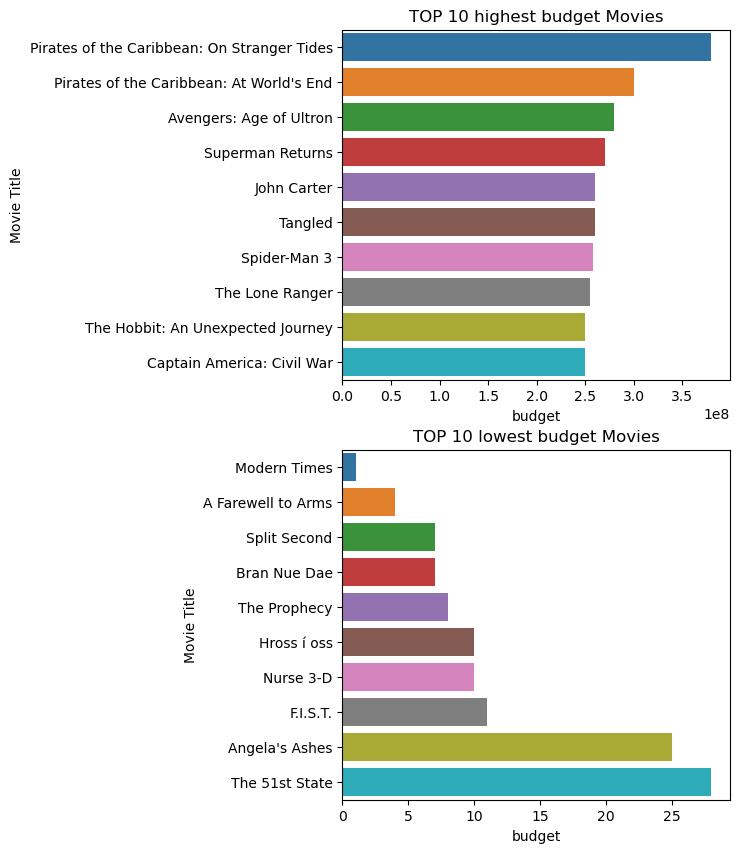

In [20]:
plt.figure(figsize=(5,10))
plt.subplot(211)
plt.figure(1)
plt.title('TOP 10 highest budget Movies')
sns.barplot(y='original_title',x='budget',data=top_10_movies)
plt.ylabel('Movie Title')

plt.subplot(212)
plt.title('TOP 10 lowest budget Movies')
sns.barplot(y='original_title',x='budget',data=top_10lowest_movies)
plt.ylabel('Movie Title')


 # Task -7:
# How are popularities of movies related with the movie budgets? Are they correlated or totally uncorrelated with each other? Write the interpretation of your analysis.
# 

In [21]:
movie.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

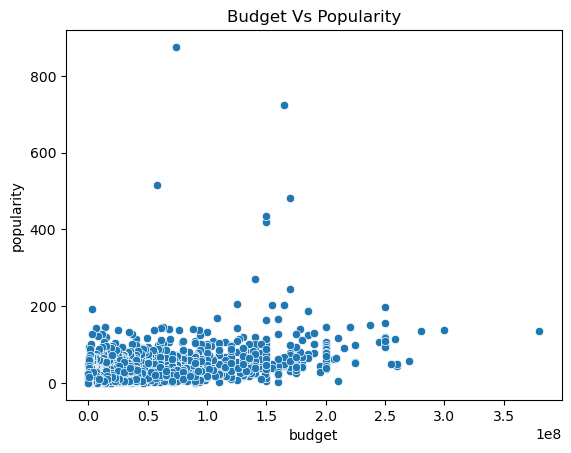

In [22]:
plt.title('Budget Vs Popularity')
sns.scatterplot(y=movie.popularity,x=movie.budget)
plt.show()

# Task - 8: 
# Identify and display the names of all production companies along with the number of times they appear in the dataset.
# 

In [23]:
movie.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [24]:
movie_productionname_flatten=movie.explode('production_companies')
t8=movie_productionname_flatten.production_companies.value_counts()
t8

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
                                         ... 
HW Two                                      1
Unfinished Films                            1
Infinity Features Entertainment             1
British Columbia Film                       1
Daiei Studios                               1
Name: production_companies, Length: 3564, dtype: int64

# #Task -9: 
# Display the names of the top 25 production companies based on the number of movies they have produced in descending order of the number of movies produced.
# 


In [33]:
t9=t8.nlargest(25)
t9

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
New Line Cinema                           142
Relativity Media                          100
Walt Disney Pictures                       96
Touchstone Pictures                        93
Metro-Goldwyn-Mayer (MGM)                  92
Columbia Pictures Corporation              86
Village Roadshow Pictures                  73
Miramax Films                              67
DreamWorks SKG                             67
United Artists                             64
Regency Enterprises                        59
Dune Entertainment                         54
TriStar Pictures                           50
Lionsgate                                  49
Canal+                                     48
Summit Entertainment                       48
Fox Searchlight Pictures          

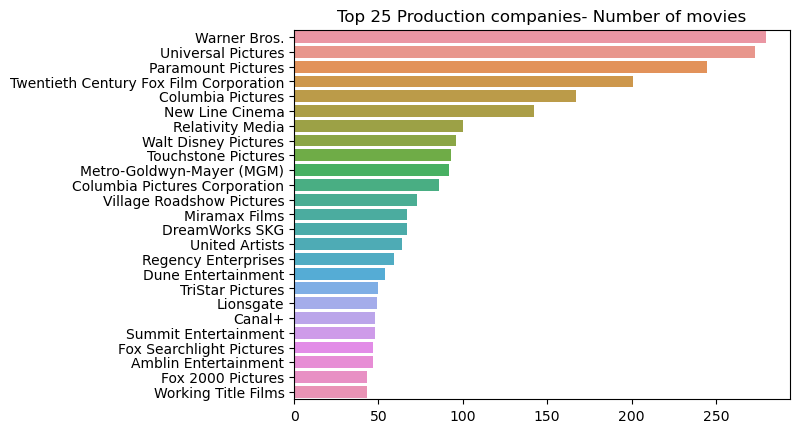

In [29]:
plt.title('Top 25 Production companies- Number of movies')
sns.barplot(y=t9.index,x=t9.values)
plt.show()



# Task - 10:
# Sort the data in descending order based on revenue and filter the top 500 movies. Find the measures of central tendency for the following columns using the filtered data:
# 1. budget
# 2. revenue
# 3. runtime
# Perform outlier analysis for the above three columns using box plots.


In [ ]:
t10=movie.nlargest(500,'revenue')
t10.head()

In [ ]:
def hist_box(col):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.title(f'{col}- Histogram')
    sns.histplot(t10[col],kde=True)

    plt.subplot(1,2,2)
    plt.title(f'{col}- BoxPlot')
    sns.boxplot(x=t10[col],color='purple',whis=True,fliersize=5)
    plt.show()

In [ ]:
columns=['budget','revenue','runtime']
for col in columns:
    hist_box(col)



In [ ]:
iqr_df=pd.DataFrame(index=['Mean','Median','Mode','Min','LowerBound','Q1','Q3','IQR','UpperBound','Max'])

def iqr(col):
    mean=t10[col].mean()
    median=t10[col].median()
    mode=t10[col].mode()[0]
    min=t10[col].min()
    
    Q1=t10[col].quantile(0.25)
    Q3=t10[col].quantile(0.75)
    IQR=Q3-Q1
    LowerBound=Q1-1.5*IQR
    UpperBound=Q3+1.5*IQR
    max=t10[col].max()
    
    ins=[mean,median,mode,min,LowerBound,Q1,Q3,IQR,UpperBound,max]

    iqr_df.insert(len(iqr_df.columns),column=f'{col}',value=ins)
    

for i in columns:
    iqr(i)
display(iqr_df)

In [ ]:
def remove_outliers(df, columns):
    df_no_outliers = df.copy()

    for col in columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        LowerBound = Q1 - 1.5 * IQR
        UpperBound = Q3 + 1.5 * IQR

        df_no_outliers = df_no_outliers[(df_no_outliers[col] > LowerBound) & (df_no_outliers[col] < UpperBound)]

    return df_no_outliers

In [ ]:
t10_no_outliers=remove_outliers(t10,columns)


In [ ]:
t10_no_outliers.shape


# Task - 11:
# Identify and display the names of the movies along with their run times for those movies that have above average runtime, using the data from the previous task.


In [ ]:
t10_no_outliers[t10_no_outliers.runtime>t10_no_outliers.runtime.mean()][['title','runtime']]
